# Relatório Final - Supercomputação

### André Barone Rocco
### Professor: Luciano Silva


## Contextualização:

Neste relatório, serão analisados dois métodos de alinhamento de sequências de DNA **paralelos** estudados durante a matéria de Supercomputação e compará-los com suas versões sequenciais. O objetivo deles é reconhecer a melhor pontuação de **matches** entre duas sequências:

#### Busca Exaustiva:
A busca exaustiva é diferente dos outros métodos por se basear fortemente em exploration. Todas as subsequências possíveis das duas sequências são testadas umas com as outras para achar uma pontuação definitiva. Este método garante uma solução global, embora seja a custo de performance. 

#### Algoritmo de Smith-Waterman:
Para a heurística, foi usado o algoritmo de Smith-Waterman. Este consiste em comparar as sequências de DNA por meio de uma matriz, analisando as subsequências e atribuindo uma pontuação a cada uma baseado em acertos, erros ou vazios. A partir disso, é traçado um caminho da maior pontuação até um valor 0 e assim formando a melhor sequência. É um método que se baseia em 'exploitation', ou seja, não há garantia de que a sequência obtida será a melhor globalmente, mas sim localmente.

#### Busca Exaustiva Paralela:
A busca exaustiva foi feita a partir da biblioteca **openmp**, que facilita a paralelização para **CPUs**. As operações do 'for' utilizado foram divididas entre as diferentes threads, assim cortando substancialmente o tempo para rodar.

#### Algoritmo de Smith-Waterman Paralelo:
O algoritmo de Smith-Waterman foi utilizado em conjunto com a biblioteca **thrust** para paralelizar operações entre **cuda cores** de GPUs da NVIDIA. Este processo melhora drasticamente a performance do programa. Como não possuo uma placa de vídeo da NVIDIA em meu computador pessoal, o programa foi rodado pelo Google Colab.

In [1]:
import os
import time
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import subprocess
from IPython import display
import random

Gerando Entradas

In [2]:
inputList= list()
n=0
for i in range(10, 150, 15):
   for j in range(10, 150, 15):
        file = "./inputs/dna" + str(n) + ".seq"
        f = open(file, 'w')
        inp=[str(i)+'\n',
             str(j)+'\n',
             ''.join(random.choices(['A','T','C','G','-'],k=i))+'\n',
             ''.join(random.choices(['A','T','C','G','-'],k=j))]
        f.writelines(inp)
        f.close()
        n += 1

Calculando tempo de cada método

In [5]:
inputs = []
for k in range(100):
    inputs.append("./inputs/dna" + str(k) + ".seq")

methods = ['./Busca-Exaustiva-Paralela/ExParalelo', './Busca-Exaustiva/Exaustiva', './Smith-Waterman/Smith-Waterman']

def runtime(method, input_file):
  with open(input_file) as f:
    time_s = time.perf_counter()
    process = subprocess.run([method], input=f.read(), text=True, capture_output=True)
    time_e = time.perf_counter()

  return time_e - time_s

time_exaustiva_paralela = []

for l in inputs:
    time_exaustiva_paralela.append(runtime(methods[0], l))

In [6]:
time_exaustiva = []

for n in inputs:
    time_exaustiva.append(runtime(methods[1], n))

In [7]:
time_smith_waterman = []

for m in inputs: 
    time_smith_waterman.append(runtime(methods[2], l))

Importando tamanhos das sequências

In [8]:
listn = []
listm = []

for file in inputs:
    with open(file) as f:
        split = f.read().splitlines()
    f.close()
    listn.append(split[0])
    listm.append(split[1])
    
listn = [int(j) for j in listn]
listm = [int(k) for k in listm]

## Busca Exaustiva Sequencial

Text(0.5, 0, 'Tempo')

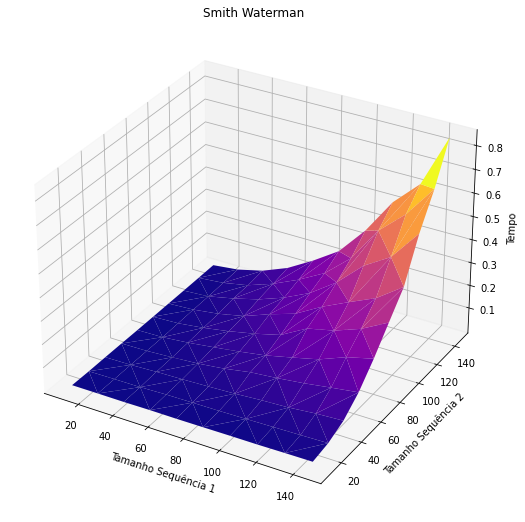

In [9]:
fig = plt.figure(figsize=(30, 50))
ax = fig.add_subplot(133, projection='3d')
ax.plot_trisurf(listm, listn, time_exaustiva, cmap="plasma")
ax.set_title("Smith Waterman")
ax.set_xlabel('Tamanho Sequência 1')
ax.set_ylabel('Tamanho Sequência 2')
ax.set_zlabel('Tempo')

## Busca Exaustiva Paralela

Text(0.5, 0, 'Tempo')

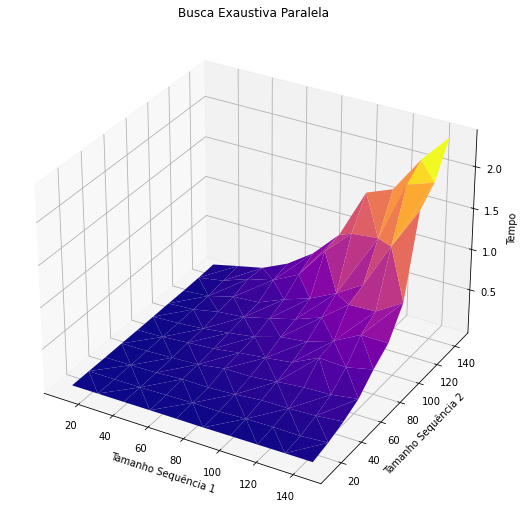

In [10]:
fig = plt.figure(figsize=(30, 50))
ax = fig.add_subplot(133, projection='3d')
ax.plot_trisurf(listm, listn, time_exaustiva_paralela, cmap="plasma")
ax.set_title("Busca Exaustiva Paralela")
ax.set_xlabel('Tamanho Sequência 1')
ax.set_ylabel('Tamanho Sequência 2')
ax.set_zlabel('Tempo')

Na busca exaustiva paralela, pode-se notar pelo gráfico que o tempo de execução do programa sobe drasticamente conforme as sequências aumentam, do mesmo jeito que a busca sequencial. Porém, pelos gráficos não podemos notar melhorias do paralelo. Isso se deve ao fato de que o tamanho das sequências é baixo demais para compensar pela paralelização. Em um ambiente com mais tempo poderíamos rodar essas sequências e então perceber vantagens na busca paralela.

## Algoritmo de Smith-Waterman Sequencial

Text(0.5, 0, 'Tempo')

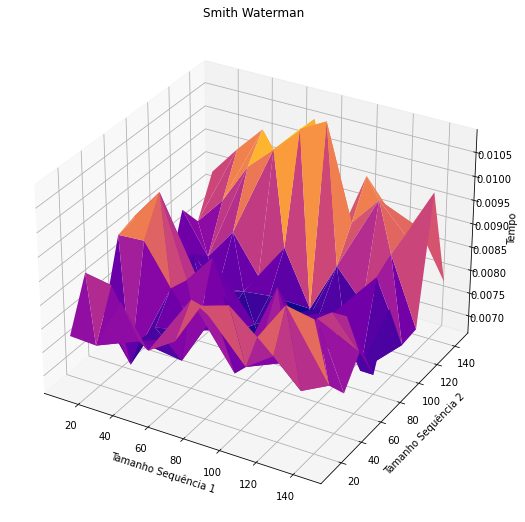

In [11]:
fig = plt.figure(figsize=(30, 50))
ax = fig.add_subplot(133, projection='3d')
ax.plot_trisurf(listm, listn, time_smith_waterman, cmap="plasma")
ax.set_title("Smith Waterman")
ax.set_xlabel('Tamanho Sequência 1')
ax.set_ylabel('Tamanho Sequência 2')
ax.set_zlabel('Tempo')

## Algoritmo de Smith-Waterman Paralelo

In [12]:
lines = [0.29340777000015805, 1.7093985940000493, 3.1463207900005727, 4.6190758879993155, 6.063356591000229, 7.510518948000026, 8.895522099000118, 10.35445829299988, 11.869070497999928, 13.378062869999667, 1.723501454000143, 0.2707259740000154, 4.656039753999721, 8.984869216000334, 13.256054251000023, 17.744480392000696, 21.939499547000196, 26.413037012999666, 31.057677534000504, 34.811091315999874, 3.154540695999458, 4.658552430999407, 0.29119078399980936, 7.511581566999666, 14.825835876000383, 21.93307188200015, 29.220780640000157, 36.788834649999444, 44.3516511910002, 50.830856386999585, 4.625227477000408, 8.951630249000118, 7.532914257999437, 0.3066691300000457, 10.698316038000485, 20.780365634999725, 30.959039123000366, 41.40459171299972, 51.29739926899947, 60.899808043999656, 6.044867720000184, 13.485387800999888, 14.81697326899939, 10.626547417999973, 0.3293206940006712, 13.470737815000575, 26.592922037999415, 39.96447142700072, 53.28424797000025, 65.93407103000027, 7.439003663999756, 17.587532771000042, 22.020260731000235, 20.656653213000027, 13.691704384999866, 0.3519831350004097, 16.360436311999365, 32.435533784000654, 48.60189418099981, 64.88272257900007, 8.98871134500041, 22.312104094999995, 29.53788076699948, 30.64219626799968, 26.889834169000096, 16.346642657999837, 0.37454792199969233, 19.38164914400022, 38.26028130399936, 57.35079019600016, 10.44098394499997, 26.20531555100024, 36.21865887199965, 41.20790325100006, 40.00877202299944, 32.6191956470002, 19.512782542999958, 0.37628275500082964, 22.313152861000162, 43.61375151299944, 11.8006141449996, 30.59690232399953, 44.02382862200011, 51.70631078600036, 53.45213202300056, 48.512724874000014, 37.90862141100024, 22.26809393199983, 0.40126867099934316, 25.342190922000555, 13.514247234000322, 35.27474873200026, 51.66982446499969, 61.016298577999805, 65.55874306899932, 64.35835228299948, 57.47400897400075, 44.391712492000806, 25.263615164999464, 0.41380428399952507]

listn_gpu = []
listm_gpu = []

inputs_gpu = []
for k in range(100):
    inputs_gpu.append("./inputs_gpu/dna" + str(k) + ".seq")

for file in inputs_gpu:
    with open(file) as f:
        split = f.read().splitlines()
    f.close()
    listn_gpu.append(split[0])
    listm_gpu.append(split[1])
    
listn_gpu = [int(j) for j in listn_gpu]
listm_gpu = [int(k) for k in listm_gpu]

Text(0.5, 0, 'Tempo')

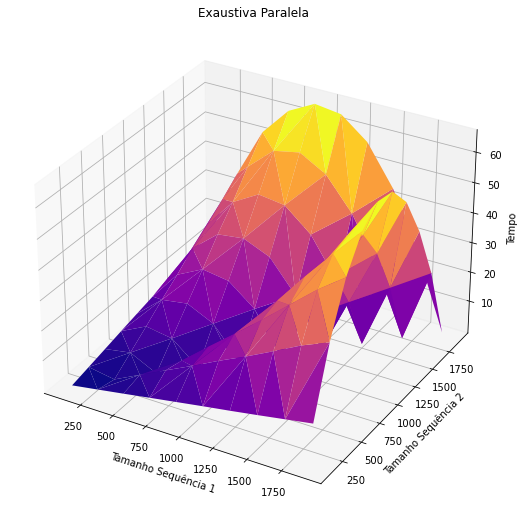

In [13]:
fig = plt.figure(figsize=(30, 50))
ax = fig.add_subplot(133, projection='3d')
ax.plot_trisurf(listm_gpu, listn_gpu, lines, cmap="plasma")
ax.set_title("Exaustiva Paralela")
ax.set_xlabel('Tamanho Sequência 1')
ax.set_ylabel('Tamanho Sequência 2')
ax.set_zlabel('Tempo')

Por ter sido rodado em outro computador que o outro método, sua comparação com o algoritmo sequencial não é justa. Apesar disso, pode-se notar pelo gráfico que a paralelização por GPU é imensamente mais rápida, já que possui um número elevado de núcleos e assim podemos rodar o método com sequências de até 2000 nucleotídeos.